## Initialization

In [1]:
from langchain_ollama.llms import OllamaLLM

import torch
device = torch.device('cuda:0')

query = "Hello!"

c:\Users\Joshua\anaconda3\envs\llm_env\Lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.2.3) or chardet (None)/charset_normalizer (2.1.1) doesn't match a supported version!
  warnings.warn(


### Llama 3.2 - 3B

In [2]:
model = OllamaLLM(model="llama3.2:3b")

print(model.invoke(query))

Hello! It's nice to meet you. Is there something I can help you with or would you like to chat?


### Gemma2 - 9B

In [3]:
model = OllamaLLM(model="gemma2")

print(model.invoke(query))

Hello! 👋 

How can I help you today? 😊


### Qwen2.5 - 7B

In [4]:
model = OllamaLLM(model="qwen2.5")

print(model.invoke(query))

Hello! How can I assist you today?


### Mistral - 7B

In [5]:
model = OllamaLLM(model="mistral")

print(model.invoke(query))

 Hello! How can I help you today?

I'm an assistant designed to provide information, answer questions, and engage in meaningful conversations. Feel free to ask me anything, from the simplest question to complex topics like science, history, or technology. If you have any specific requests or preferences, let me know so I can tailor my responses to your needs!

What would you like to talk about today?


## Query Answers (without context)

In [6]:
from langchain_ollama.llms import OllamaLLM
from langchain.prompts import PromptTemplate
import torch
import os
from tqdm import tqdm

device = torch.device('cuda:0')

questions = ["Explain how blockchain reduces fraud in international trade, focusing on transparency, traceability, and decentralization.", 
             "Analyze blockchain's impact on healthcare, including data management, supply chain, and billing systems.",
             "Describe blockchain-based KYC processes and their advantages over traditional methods.",
             "Evaluate blockchain's role in cross-border payments, emphasizing cost, speed, and transparency.",
             "Discuss the potential and challenges of integrating AI with blockchain technology."]

template = """Answer the given question based on your knowledge.

Question : {question}

Instructions for answering
1. The question has to be answered with a minimum of 100 words and a maximum of 500 words.
2. Atleast 3 paragraphs have to be present - 1 introduction, 1 conclusion and 1 with the content.
3. Bullet points and subheadings can be present.
4. Proper markdown format has to be followed.

Answer:"""

prompt = PromptTemplate.from_template(template)

models = ["llama3.2:3b", "gemma2", "qwen2.5", "mistral"]
output_folders = ["llama", "gemma", "qwen", "mistral"]

if not os.path.exists("answers_db"):
    os.makedirs("answers_db")

if not os.path.exists("answers_db/no_context"):
    os.makedirs("answers_db/no_context")
    
for folder_name in output_folders:
    if not os.path.exists(f"answers_db/no_context/{folder_name}"):
        os.makedirs(f"answers_db/no_context/{folder_name}")
    
for folder_name in output_folders:
    for i in range(len(questions)):
        f = open(f"answers_db/no_context/{folder_name}/Turn {i}.md", "w", newline='')
        f.close()

In [7]:
for model_name, output_folder in zip(models, output_folders):
    
    model = OllamaLLM(model=model_name)
    
    turn = 0
    for question in tqdm(questions, desc=model_name):
        chain = prompt.format(**{"question": question})
        answer = model.invoke(chain)
        
        f = open(f"answers_db/no_context/{output_folder}/Turn {turn}.md", "w")
        f.write(answer)
        f.close()
        
        turn += 1
    

mistral: 100%|██████████| 5/5 [04:22<00:00, 52.45s/it]


## Average Response Time (without context)

In [8]:
from langchain_ollama.llms import OllamaLLM
from langchain.prompts import PromptTemplate
import torch
from timeit import default_timer as timer
import csv
from tqdm import tqdm
import os

device = torch.device('cuda:0')

questions = ["Explain how blockchain reduces fraud in international trade, focusing on transparency, traceability, and decentralization.", 
             "Analyze blockchain's impact on healthcare, including data management, supply chain, and billing systems.",
             "Describe blockchain-based KYC processes and their advantages over traditional methods.",
             "Evaluate blockchain's role in cross-border payments, emphasizing cost, speed, and transparency.",
             "Discuss the potential and challenges of integrating AI with blockchain technology."]

template = """Answer the given question based on your knowledge.

Question : {question}

Instructions for answering
1. The question has to be answered with a minimum of 100 words and a maximum of 500 words.
2. Atleast 3 paragraphs have to be present - 1 introduction, 1 conclusion and 1 with the content.
3. Bullet points and subheadings can be present.
4. Proper markdown format has to be followed.

Answer:"""

prompt = PromptTemplate.from_template(template)

models = ["llama3.2:3b", "gemma2", "qwen2.5", "mistral"]
logs = ["llama", "gemma", "qwen", "mistral"]

if not os.path.exists("time_db"):
    os.makedirs("time_db")

if not os.path.exists("time_db/no_context"):
    os.makedirs("time_db/no_context")

for logfile in logs:
    f = open(f"time_db/no_context/{logfile}.csv", "w", newline='')
    csv.writer(f).writerow(["Iteration", "Turn", "Duration"])
    f.close()

In [9]:
for model_name, logfile in zip(models, logs):
    
    print(model_name)
    print()
    
    model = OllamaLLM(model=model_name)
    
    for iter in range(1, 26):        
        turn = 0
        for question in tqdm(questions, desc=f'Iteration {iter}'):
            chain = prompt.format(**{"question": question})
            
            start = timer()
            model.invoke(chain)
            end = timer()
            
            f = open(f"time_db/no_context/{logfile}.csv", "a", newline='')
            csv_writer = csv.writer(f)
            csv_writer.writerow([f'Iteration {iter}', f'Turn {turn}', end-start])
            f.close()
            
            turn += 1        
    print("\n")

llama3.2:3b



Iteration 25: 100%|██████████| 5/5 [02:08<00:00, 25.61s/it]




gemma2



Iteration 25: 100%|██████████| 5/5 [07:38<00:00, 91.78s/it] 




qwen2.5



Iteration 25: 100%|██████████| 5/5 [04:58<00:00, 59.69s/it]




mistral



Iteration 25: 100%|██████████| 5/5 [05:15<00:00, 63.12s/it]

## Query Answers (with context)

In [10]:
from langchain_ollama.llms import OllamaLLM
from langchain_community.document_loaders import PyPDFLoader
from langchain.prompts import PromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter
import torch
import os
from tqdm import tqdm

device = torch.device("cuda:0")

questions = ["Explain how blockchain reduces fraud in international trade, focusing on transparency, traceability, and decentralization.", 
             "Analyze blockchain's impact on healthcare, including data management, supply chain, and billing systems.",
             "Describe blockchain-based KYC processes and their advantages over traditional methods.",
             "Evaluate blockchain's role in cross-border payments, emphasizing cost, speed, and transparency.",
             "Discuss the potential and challenges of integrating AI with blockchain technology."]

template = """Answer the given question based only on the context given below.

Context : {context}

Question : {question}

Instructions for answering
1. The question has to be answered with a minimum of 100 words and a maximum of 500 words.
2. Atleast 3 paragraphs have to be present - 1 introduction, 1 conclusion and 1 with the content.
3. Bullet points and subheadings can be present.
4. Proper markdown format has to be followed.

Answer:"""

prompt = PromptTemplate.from_template(template)

models = ["llama3.2:3b", "gemma2", "qwen2.5", "mistral"]
output_folders = ["llama", "gemma", "qwen", "mistral"]

if not os.path.exists("answers_db"):
    os.makedirs("answers_db")

if not os.path.exists("answers_db/context"):
    os.makedirs("answers_db/context")
    
for folder_name in output_folders:
    if not os.path.exists(f"answers_db/context/{folder_name}"):
        os.makedirs(f"answers_db/context/{folder_name}")
    
for folder_name in output_folders:
    for i in range(len(questions)):
        f = open(f"answers_db/context/{folder_name}/Turn {i}.md", "w", newline='')
        f.close()

loader = PyPDFLoader("Applications of Blockchain.pdf")
pages = loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
texts = text_splitter.split_documents(pages)

context_text = "\n\n".join([doc.page_content for doc in texts])

In [11]:
for model_name, output_folder in zip(models, output_folders):
    
    model = OllamaLLM(model=model_name)
    
    turn = 0
    for question in tqdm(questions, desc=model_name):
        chain = prompt.format(**{"context": context_text, "question": question})
        answer = model.invoke(chain)
        
        f = open(f"answers_db/context/{output_folder}/Turn {turn}.md", "w")
        f.write(answer)
        f.close()
        
        turn += 1
    

mistral: 100%|██████████| 5/5 [14:01<00:00, 168.24s/it]


## Average Response Time (with context)

In [12]:
from langchain_ollama.llms import OllamaLLM
from langchain.prompts import PromptTemplate
from langchain_community.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
import torch
from timeit import default_timer as timer
import csv
from tqdm import tqdm
import os

device = torch.device('cuda:0')

questions = ["Explain how blockchain reduces fraud in international trade, focusing on transparency, traceability, and decentralization.", 
             "Analyze blockchain's impact on healthcare, including data management, supply chain, and billing systems.",
             "Describe blockchain-based KYC processes and their advantages over traditional methods.",
             "Evaluate blockchain's role in cross-border payments, emphasizing cost, speed, and transparency.",
             "Discuss the potential and challenges of integrating AI with blockchain technology."]

template = """Answer the given question based only on the context given below.

Context : {context}

Question : {question}

Instructions for answering
1. The question has to be answered with a minimum of 100 words and a maximum of 500 words.
2. Atleast 3 paragraphs have to be present - 1 introduction, 1 conclusion and 1 with the content.
3. Bullet points and subheadings can be present.
4. Proper markdown format has to be followed.

Answer:"""

prompt = PromptTemplate.from_template(template)

models = ["llama3.2:3b", "gemma2", "qwen2.5", "mistral"]
logs = ["llama", "gemma", "qwen", "mistral"]

if not os.path.exists("time_db"):
    os.makedirs("time_db")

if not os.path.exists("time_db/context"):
    os.makedirs("time_db/context")

for logfile in logs:
    f = open(f"time_db/context/{logfile}.csv", "w", newline='')
    csv.writer(f).writerow(["Iteration", "Turn", "Duration"])
    f.close()
    
loader = PyPDFLoader("Applications of Blockchain.pdf")
pages = loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
texts = text_splitter.split_documents(pages)

context_text = "\n\n".join([doc.page_content for doc in texts])

In [13]:
for model_name, logfile in zip(models, logs):
    
    print(model_name)
    print()
    
    model = OllamaLLM(model=model_name)
    
    for iter in range(1, 26):        
        turn = 0
        for question in tqdm(questions, desc=f'Iteration {iter}'):
            chain = prompt.format(**{"context": context_text, "question": question})
            
            start = timer()
            model.invoke(chain)
            end = timer()
            
            f = open(f"time_db/context/{logfile}.csv", "a", newline='')
            csv_writer = csv.writer(f)
            csv_writer.writerow([f'Iteration {iter}', f'Turn {turn}', end-start])
            f.close()
            
            turn += 1        
    print("\n")

llama3.2:3b



Iteration 25: 100%|██████████| 5/5 [03:08<00:00, 37.68s/it]




gemma2



Iteration 25: 100%|██████████| 5/5 [19:25<00:00, 233.01s/it]




qwen2.5



Iteration 25: 100%|██████████| 5/5 [14:55<00:00, 179.13s/it]




mistral



Iteration 25: 100%|██████████| 5/5 [13:32<00:00, 162.52s/it]

## Results

Text(0, 0.5, 'Duration(s)')

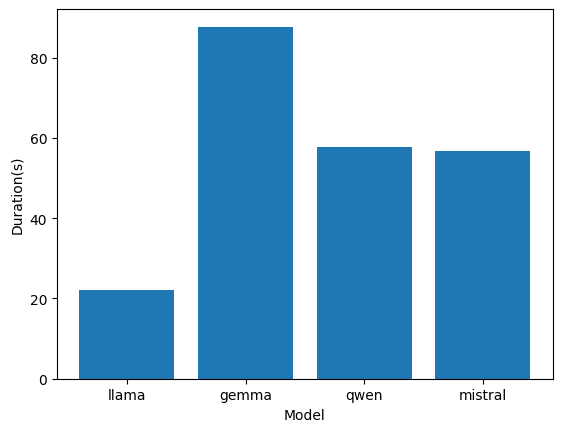

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

logs = ["llama", "gemma", "qwen", "mistral"]
no_context_time_dfs = {}

for logfile in logs:
        df = pd.read_csv(f"time_db/no_context/{logfile}.csv")
        no_context_time_dfs[logfile] = df
        
plt.bar(no_context_time_dfs.keys(), [no_context_time_dfs[x]['Duration'].mean() for x in no_context_time_dfs.keys()])
plt.xlabel("Model")
plt.ylabel("Duration(s)")

Text(0, 0.5, 'Duration(s)')

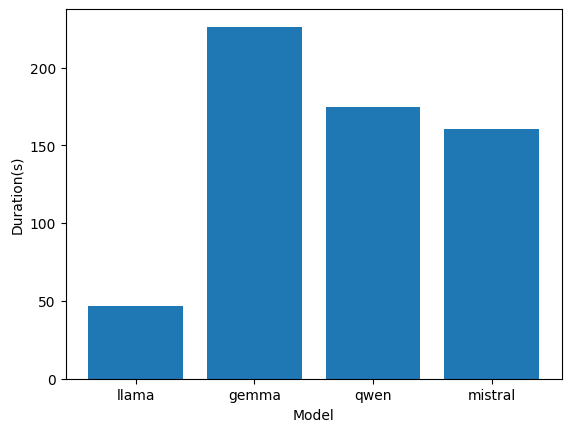

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

logs = ["llama", "gemma", "qwen", "mistral"]
context_time_dfs = {}

for logfile in logs:
        df = pd.read_csv(f"time_db/context/{logfile}.csv")
        context_time_dfs[logfile] = df
        
plt.bar(context_time_dfs.keys(), [context_time_dfs[x]['Duration'].mean() for x in context_time_dfs.keys()])
plt.xlabel("Model")
plt.ylabel("Duration(s)")

In [94]:
import pandas as pd

df = pd.read_csv("results.csv")
df.head()

grouped_data = df.groupby(['context_status', 'model']).mean(numeric_only=True)
grouped_data.drop(labels='turn', axis=1, inplace=True)
grouped_data.reset_index(inplace=True)
grouped_data

,context_status,model,accuracy,relevance,grammatical_correctness,answer_formatting
0,context,gemma,3.8,2.0,1.30,3.0
1,context,llama,4.0,2.9,1.50,2.0
2,context,mistral,3.6,0.9,2.10,1.3
3,context,qwen,4.8,3.3,2.10,2.5
4,no_context,gemma,4.8,4.1,2.50,2.7
5,no_context,llama,4.8,3.5,2.96,2.8
6,no_context,mistral,5.0,4.6,2.96,3.0
7,no_context,qwen,5.0,4.1,3.00,3.0


Text(0, 0.5, 'score (out of 3)')

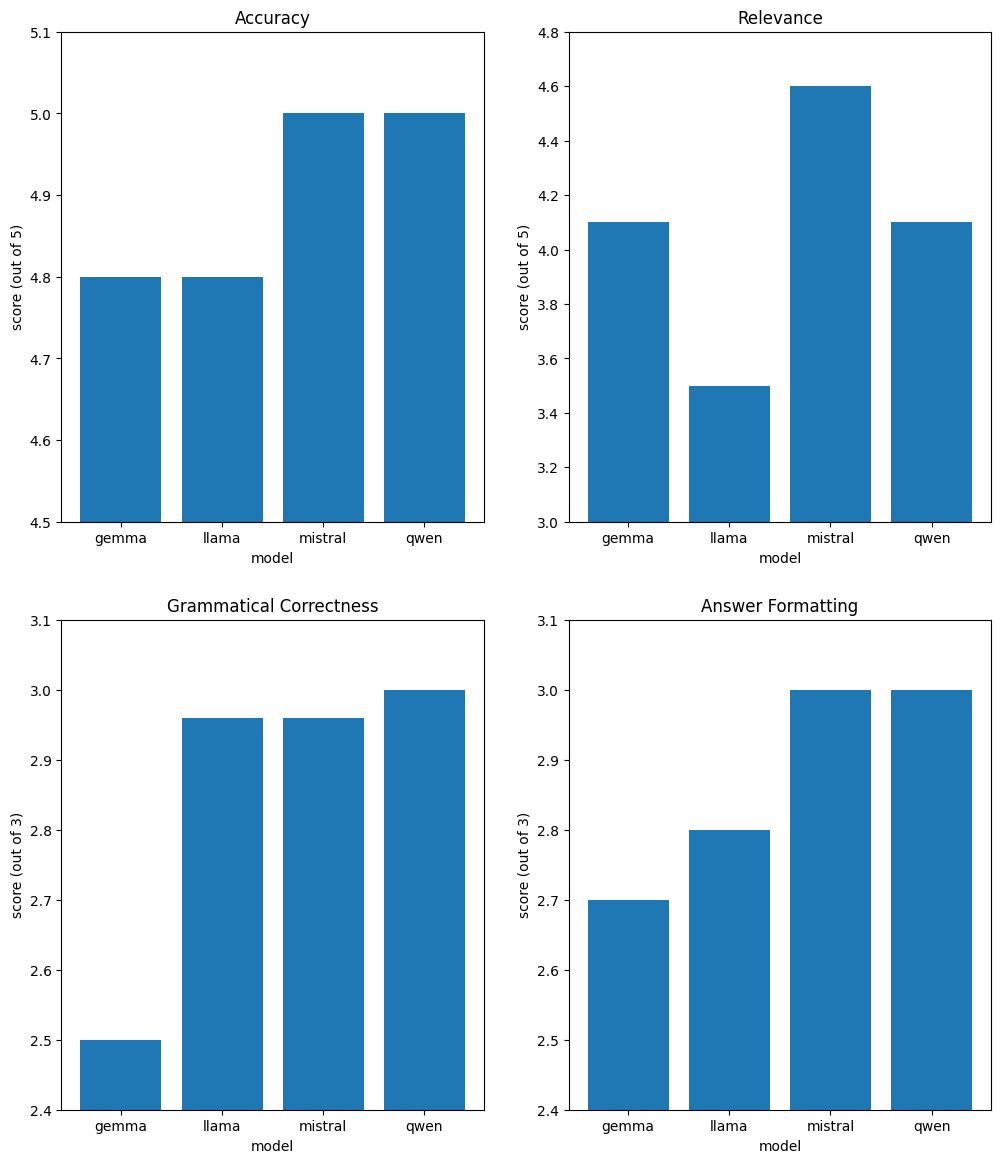

In [95]:
import matplotlib.pyplot as plt

models = ["llama", "gemma", "qwen", "mistral"]

filter_df = grouped_data[grouped_data.context_status=="no_context"]

fig = plt.figure(figsize=(12, 14))

plt.subplot2grid((2, 2), (0, 0), fig=fig)
plt.bar(filter_df.model, filter_df.accuracy)
plt.ylim(4.5, 5.1)
plt.title("Accuracy")
plt.xlabel("model")
plt.ylabel("score (out of 5)")

plt.subplot2grid((2, 2), (0, 1), fig=fig)
plt.bar(filter_df.model, filter_df.relevance)
plt.ylim(3, 4.8)
plt.title("Relevance")
plt.xlabel("model")
plt.ylabel("score (out of 5)")

plt.subplot2grid((2, 2), (1, 0), fig=fig)
plt.bar(filter_df.model, filter_df.grammatical_correctness)
plt.ylim(2.4, 3.1)
plt.title("Grammatical Correctness")
plt.xlabel("model")
plt.ylabel("score (out of 3)")

plt.subplot2grid((2, 2), (1, 1), fig=fig)
plt.bar(filter_df.model, filter_df.answer_formatting)
plt.ylim(2.4, 3.1)
plt.title("Answer Formatting")
plt.xlabel("model")
plt.ylabel("score (out of 3)")

Text(0, 0.5, 'score (out of 3)')

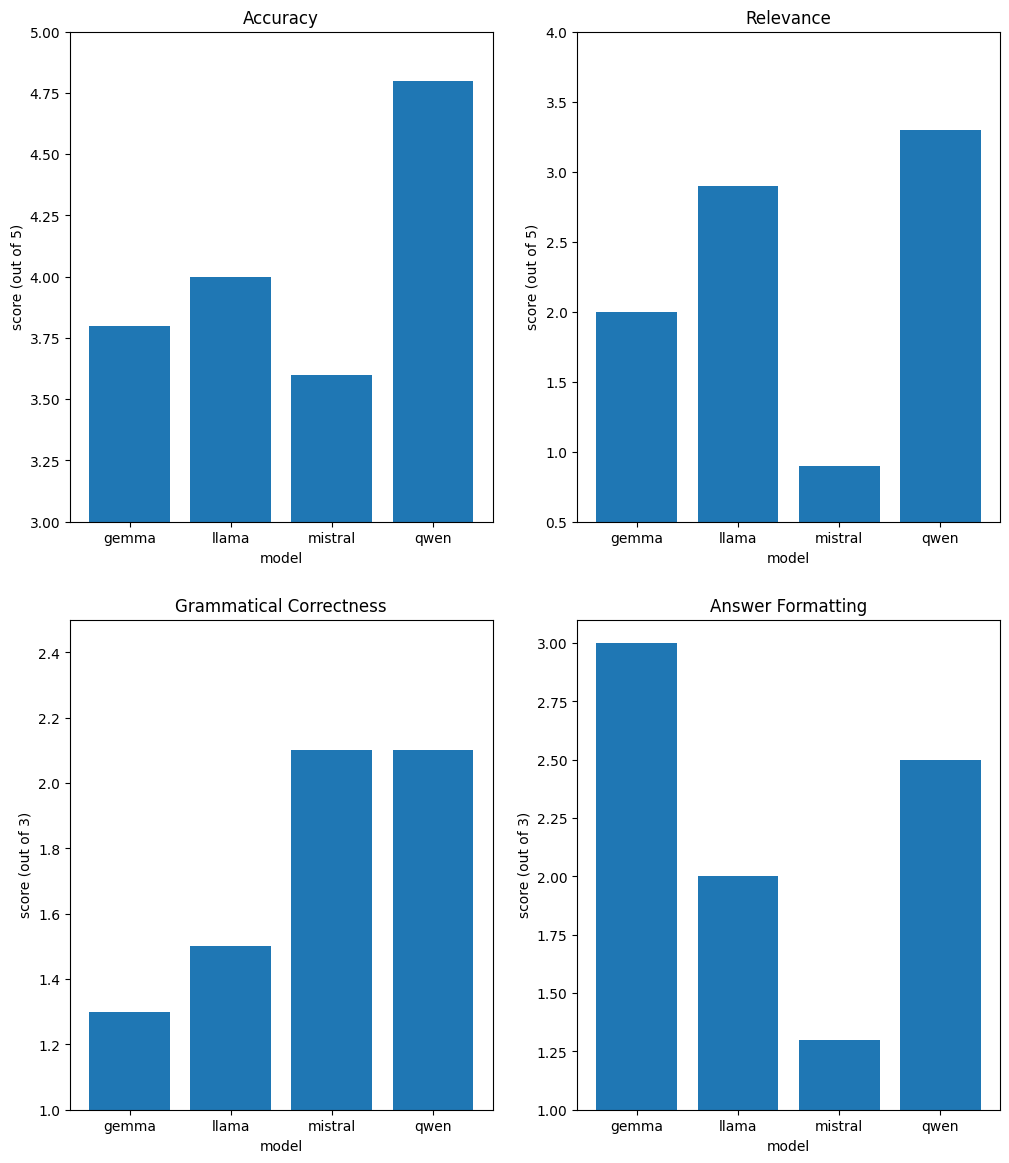

In [96]:
import matplotlib.pyplot as plt

models = ["llama", "gemma", "qwen", "mistral"]

filter_df = grouped_data[grouped_data.context_status=="context"]

fig = plt.figure(figsize=(12, 14))

plt.subplot2grid((2, 2), (0, 0), fig=fig)
plt.bar(filter_df.model, filter_df.accuracy)
plt.ylim(3, 5)
plt.title("Accuracy")
plt.xlabel("model")
plt.ylabel("score (out of 5)")

plt.subplot2grid((2, 2), (0, 1), fig=fig)
plt.bar(filter_df.model, filter_df.relevance)
plt.ylim(0.5, 4)
plt.title("Relevance")
plt.xlabel("model")
plt.ylabel("score (out of 5)")

plt.subplot2grid((2, 2), (1, 0), fig=fig)
plt.bar(filter_df.model, filter_df.grammatical_correctness)
plt.ylim(1, 2.5)
plt.title("Grammatical Correctness")
plt.xlabel("model")
plt.ylabel("score (out of 3)")

plt.subplot2grid((2, 2), (1, 1), fig=fig)
plt.bar(filter_df.model, filter_df.answer_formatting)
plt.ylim(1, 3.1)
plt.title("Answer Formatting")
plt.xlabel("model")
plt.ylabel("score (out of 3)")